<a href="https://colab.research.google.com/github/dikshabhati1/graduate_admission_prediction/blob/main/admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import required libraries
import pandas as pd 
import io
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# load second csv file
uploaded_ = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [3]:
# read  csv file
df = pd.read_csv(io.BytesIO(uploaded_['Admission_Predict_Ver1.1.csv']))
# first 5 rows of dataset
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# shape
df.shape

(500, 9)

In [5]:
# columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

We can see that their are unwanted spaces in column name.So now we are going to change our column name

In [6]:
df = df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance of Admit'})

Now I want prediction in percentage not in probability.So I am going to convert that column in % by multiplying by 100

In [7]:
# chnage probability into percentage
df['100_'] = [100 for i in range(500)]
df['Chance of Admit'] = df['Chance of Admit']*df['100_']

We don't need '100_' and 'Serial No.' column.So we can drop them

In [8]:
df.drop(['100_'],axis=1,inplace=True)

In [9]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [10]:
# final dataset
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,92.0
1,324,107,4,4.0,4.5,8.87,1,76.0
2,316,104,3,3.0,3.5,8.00,1,72.0
3,322,110,3,3.5,2.5,8.67,1,80.0
4,314,103,2,2.0,3.0,8.21,0,65.0


In [11]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


From above we can see that we have dtypes as int or float and we don't have any null value

In [12]:
# basic stats info
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,72.17400
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,14.11404
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,34.00000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,63.00000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,72.00000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,82.00000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,97.00000


# Data Visulization

Now it's time to understand our data.So let's get started and make some amazing plots

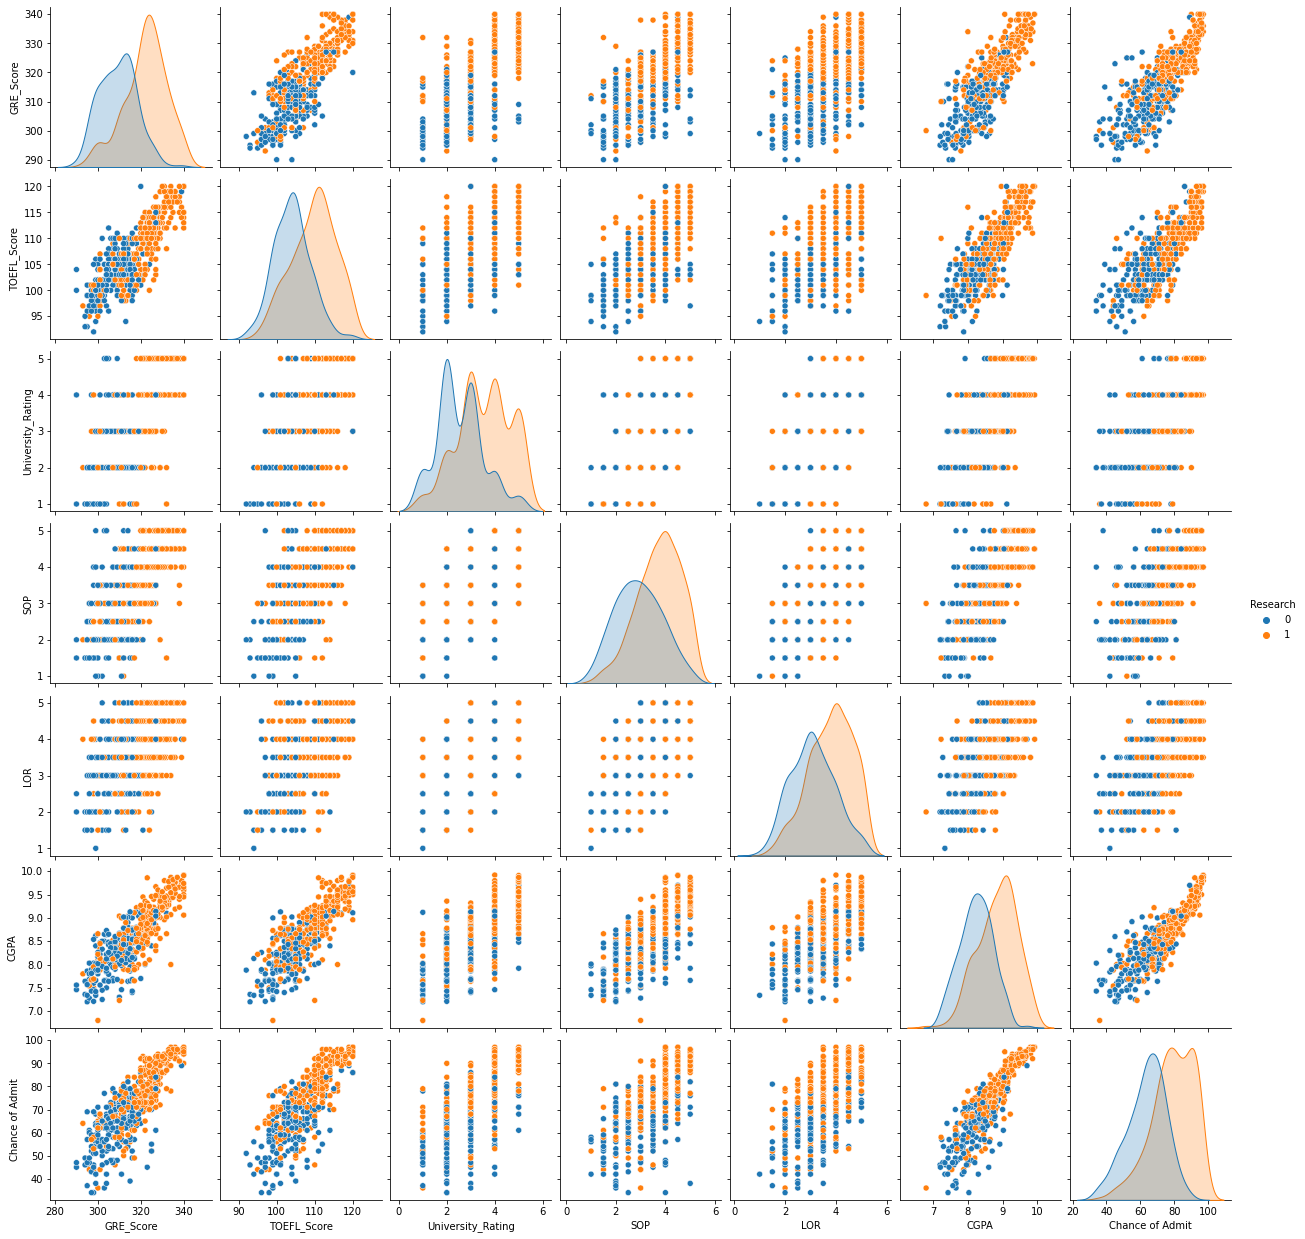

In [13]:
# pairplot
sns.pairplot(df,hue='Research')

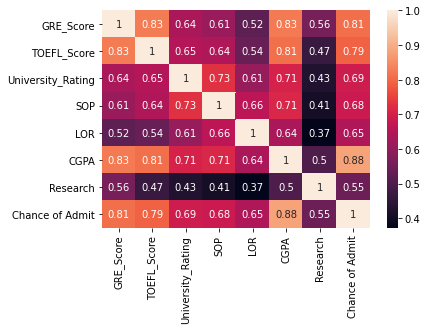

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

From above we got to knwo many things about our data

- We can see that TOEFL Score and GRE Score are highly positive correlated to each other as expected
- We don't have any values which are negative correlated to each other


### Outliers

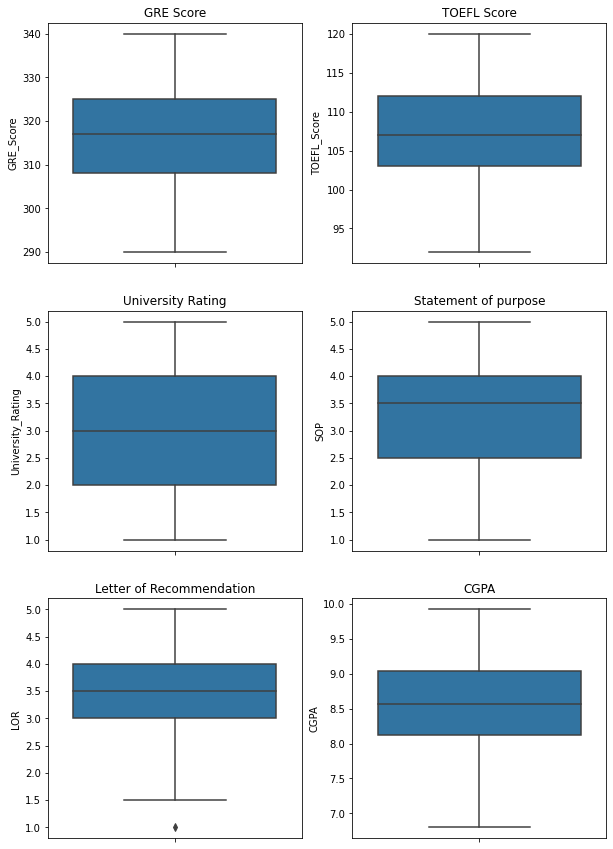

In [15]:
#box plot
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
bp=sns.boxplot(y=df.GRE_Score,ax=ax[0, 0])
ax[0, 0].set_title('GRE Score')

bp=sns.boxplot(y=df.TOEFL_Score,ax=ax[0, 1])
ax[0, 1].set_title('TOEFL Score')

bp=sns.boxplot(y=df.University_Rating,ax=ax[1, 0])
ax[1,0].set_title('University Rating')

bp=sns.boxplot(y=df.SOP,ax=ax[1, 1])
ax[1,1].set_title('Statement of purpose')

bp=sns.boxplot(y=df.LOR,ax=ax[2,0])
ax[2, 0].set_title('Letter of Recommendation')

s=sns.boxplot(y=df.CGPA,ax=ax[2, 1])
ax[2,1].set_title('CGPA')

plt.show()

So we can clearly see that we don't have any outlier.So it's clear that the student who have high score will have higher chances for admission in college

### University Rating

Text(0.5, 1.0, 'Count of University Rating')

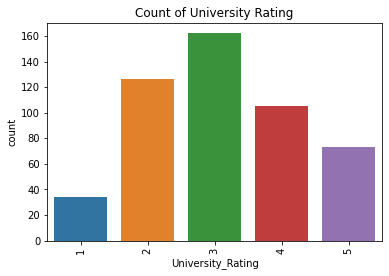

In [16]:
p=sns.countplot(x='University_Rating',data=df)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.title('Count of University Rating')

### Reserach

Text(0.5, 1.0, 'Count of Research')

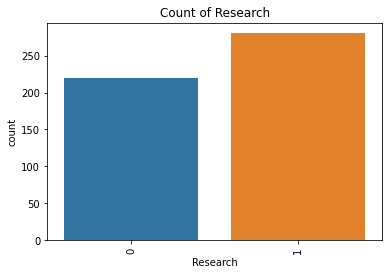

In [17]:
p=sns.countplot(x='Research',data=df)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.title('Count of Research')

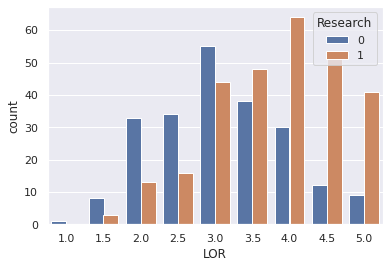

In [18]:
sns.set(style='darkgrid')
sns.countplot(x='LOR',hue='Research',data=df)

### GRE Score vs TOEFL Score

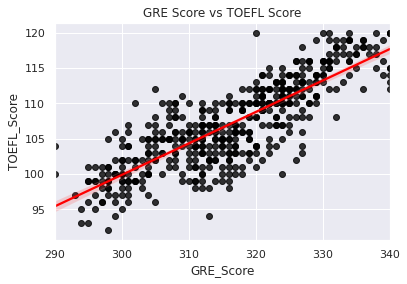

In [19]:
ax = sns.regplot(x="GRE_Score", y="TOEFL_Score", data=df , scatter_kws = {'color':'black'} , line_kws = {'color':'red'})
plt.title("GRE Score vs TOEFL Score")
plt.show()

Students with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

### GRE Score vs CGPA

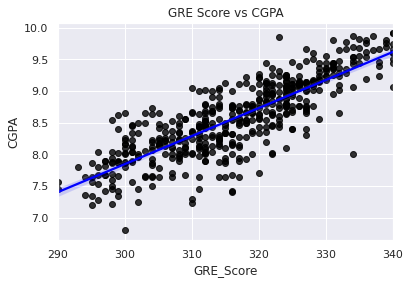

In [20]:
ax = sns.regplot(x="GRE_Score", y="CGPA", data=df ,  scatter_kws = {'color':'black'} , line_kws = {'color':'blue'} )
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working

## Feature Importance

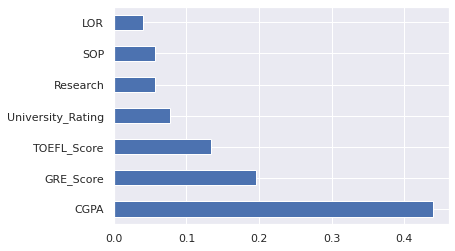

In [22]:
model = ExtraTreesRegressor() 
model.fit(df.iloc[:,:-1],df.iloc[:,-1])

feat_impt = pd.Series(model.feature_importances_, index = df.iloc[:,:-1].columns) 
feat_impt.nlargest(7).plot(kind='barh')
plt.show()

From above we can clearly see that CGPA is the most important key for getting Admission in college

# Model Building

In [23]:
# # dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
y

0      92.0
1      76.0
2      72.0
3      80.0
4      65.0
       ... 
495    87.0
496    96.0
497    93.0
498    73.0
499    84.0
Name: Chance of Admit, Length: 500, dtype: float64

In [25]:
# splitting into train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

### Randomized Search CV

In [26]:
#parameters
n_estimators=[100,200,300,400,500,600,700,800,900,1000]
max_depth=[2,4,6,8,10,12,14]
min_samples_split=[5,15,25,35,45,55]
max_features=['auto','sqrt','log2']
min_samples_leaf=[2,4,6,8]

#hyperparameter grid
hyper_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf
}

In [27]:
regressor =RandomForestRegressor()

random_cv2 = RandomizedSearchCV(estimator=regressor,param_distributions=hyper_grid,
                              cv=5,n_iter=20,scoring='neg_mean_absolute_error',verbose=3,n_jobs=1,random_state=121
                              )
#fitting X_train and y_train
random_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-4.207, total=   0.6s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-4.481, total=   0.6s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-4.776, total=   0.6s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 
[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-4.543, total=   0.6s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 
[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-5.260, total=   0.6s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14, score=-4.020, total=   0.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14, score

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

# Prediction and MAE

In [32]:
# prediction
prediction = random_cv2.predict(X_test)

In [33]:
#calculating mean absolute error of random forest
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

4.160108161052749

In [34]:
random_cv2.best_score_

-4.479101868799772

In [35]:
import pickle
# open a file, where you ant to store the data
file = open('graduate_admission.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv2, file)

In [36]:
%%writefile Procfile
web: gunicorn app:app

Writing Procfile


In [ ]:
%mkdir templates -p

In [38]:
!pip install flask-ngrok

In [39]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [40]:
!pip install jsonify

  Created wheel for jsonify: filename=jsonify-0.5-cp36-none-any.whl size=1564 sha256=1898b26d901d113514bd4d9842cc6125827a049a506e6f742fb4e941bb8e4650
  Stored in directory: /root/.cache/pip/wheels/ba/51/8a/136c19b604769b6cb4946fc3402a7068d86fe1f43f8824e2bf
Successfully built jsonify


In [41]:
! pip install flask_cors

In [42]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Admission</title>
</head>

<body>

    <div style="color: #001f4d">
        <form action="{{ url_for('predict')}}" method="post">
            <h1 id="heading">Predict Admission Chances</h1>
            <h3>GRE Score(out of 340)</h3><input id="first" name="GRE_Score" required="number" >
            <h3>TOEFL Score (out of 120)</h3><input id="second" name="TOEFL_Score" required="required">
            <h3>University Rating (out of 5)</h3><input id="third" name="University_Rating" required="required" >
            <h3>Statement of Purpose (out of 5)</h3><input id="fourth" name="SOP" required="required">
            <h3>Letter of Recommendation (out of 5)</h3><input id="fifth" name="LOR" required="required">
            <h3>CGPA (out of 10)</h3><input id="sixth" name="CGPA" required="required">
            <h3>Research</h3><input id="seventh" name="Research" required="required" >
            
            <br><br><button id="sub" type="submit">Calculate the Admission probability</button>
            <br>




        </form>

    </div>

        <br><br><h1><font-color="black">{{ prediction_text }}</font><h1>
    




    <style>
        body {
            background-image: url("https://images.unsplash.com/photo-1549168151-915106dc1597?ixid=MXwxMjA3fDB8MHxzZWFyY2h8MTd8fGJvb2tzfGVufDB8MXwwfHdoaXRl&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60");
            text-align: center;
            padding: 0px;
            background-position:center; background-repeat:no-repeat; background-size:cover;
            margin:auto;
        }
        #heading{
            line-height:80px;
            color:white;
            background-color:#696969;
        }

        h1{background-color:#f2f2f2}
      
        h3{margin-bottom:0px;}
        
        #first {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }
        
       
        
        #second {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }
        
       
        
        #third {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }
        
    
        #fourth {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }


        #fifth {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 14px;
            font-size: 18px;
           
        }
        

        #sixth {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }
        

        #seventh {
            width: 300px;
            height: 43px;
            text-align: center;
            border-radius: 16px;
            font-size: 18px;
           
        }


         #sub {
             width: 500px;
            border-radius: 16px;
            height: 50px;
            font-size: 18px;
            text-align: center;
        
        }

        #sub:hover {
            background-color :#99ccff ;
        }

    </style>
</body>

</html>

Writing templates/index.html


In [43]:
%%writefile app.py
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
run_with_ngrok(app)
model = pickle.load(open('graduate_admission.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')


standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
    
    if request.method == 'POST':
        GRE_Score = int(request.form['GRE_Score'])
        TOEFL_Score=int(request.form['TOEFL_Score'])
        University_Rating=int(request.form['University_Rating'])
        SOP=float(request.form['SOP'])
        LOR=float(request.form['LOR'])
        CGPA=float(request.form['CGPA'])
        Research=int(request.form['Research'])
       
        prediction=model.predict([[GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research]])
        output=round(prediction[0],2)
        if output<0:
            return render_template('index.html',prediction_text="Sorry you cannot take admission")
        else:
            return render_template('index.html',prediction_text="Your Chance of Admission is {} %".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    app.run()

Writing app.py
